In [1]:
import numpy as np
import pandas as pd
#import matplotlib.pylab as plt
import seaborn as sns
import matplotlib.gridspec as gridspec
%pylab inline
%qtconsole
%config InlineBackend.figure_format = 'retina'

Populating the interactive namespace from numpy and matplotlib


# Load Data table

In [3]:
# load data table
Predtbl = pd.read_csv('DataSample.csv','\t')
#Predtbl['sbj']     = Predtbl['sbj'].astype('category')
#Predtbl['trial']   = Predtbl['trial'].astype('category')

isbj    = 1
sbjtbl  = Predtbl[Predtbl.sbj == isbj]

# Preprocess

In [5]:
# registrate fixation by their spatial location
nitem,_ = sbjtbl.shape
xfix    = np.asarray(sbjtbl['xfix'])
yfix    = np.asarray(sbjtbl['yfix'])

# leftrect1,leftrect2,leftrect3,leftrect4,rightrect1,rightrect2,rightrect3,rightrect4 \
# = np.asarray(sbjtbl.iloc[0,13:21])
loc     = np.zeros(nitem)
index1  = [(sbjtbl['leftrect1'] < xfix) & (sbjtbl['leftrect3'] > xfix) &\
          (sbjtbl['leftrect2'] < yfix) & (sbjtbl['leftrect4'] > yfix)]
loc[np.where(index1)[1]] = 1 # left stimulus
index2  = [(sbjtbl['rightrect1'] < xfix) & (sbjtbl['rightrect3'] > xfix) &\
          (sbjtbl['rightrect2'] < yfix) & (sbjtbl['rightrect4'] > yfix)]
loc[np.where(index2)[1]] = -1 # right stimulus

trialall = np.asarray([sbjtbl.sbj-1])*[sbjtbl.trial.max()] + np.asarray(sbjtbl.trial)
trial    = np.unique(trialall)
ntrial   = np.size(trial)

# Temporal plot

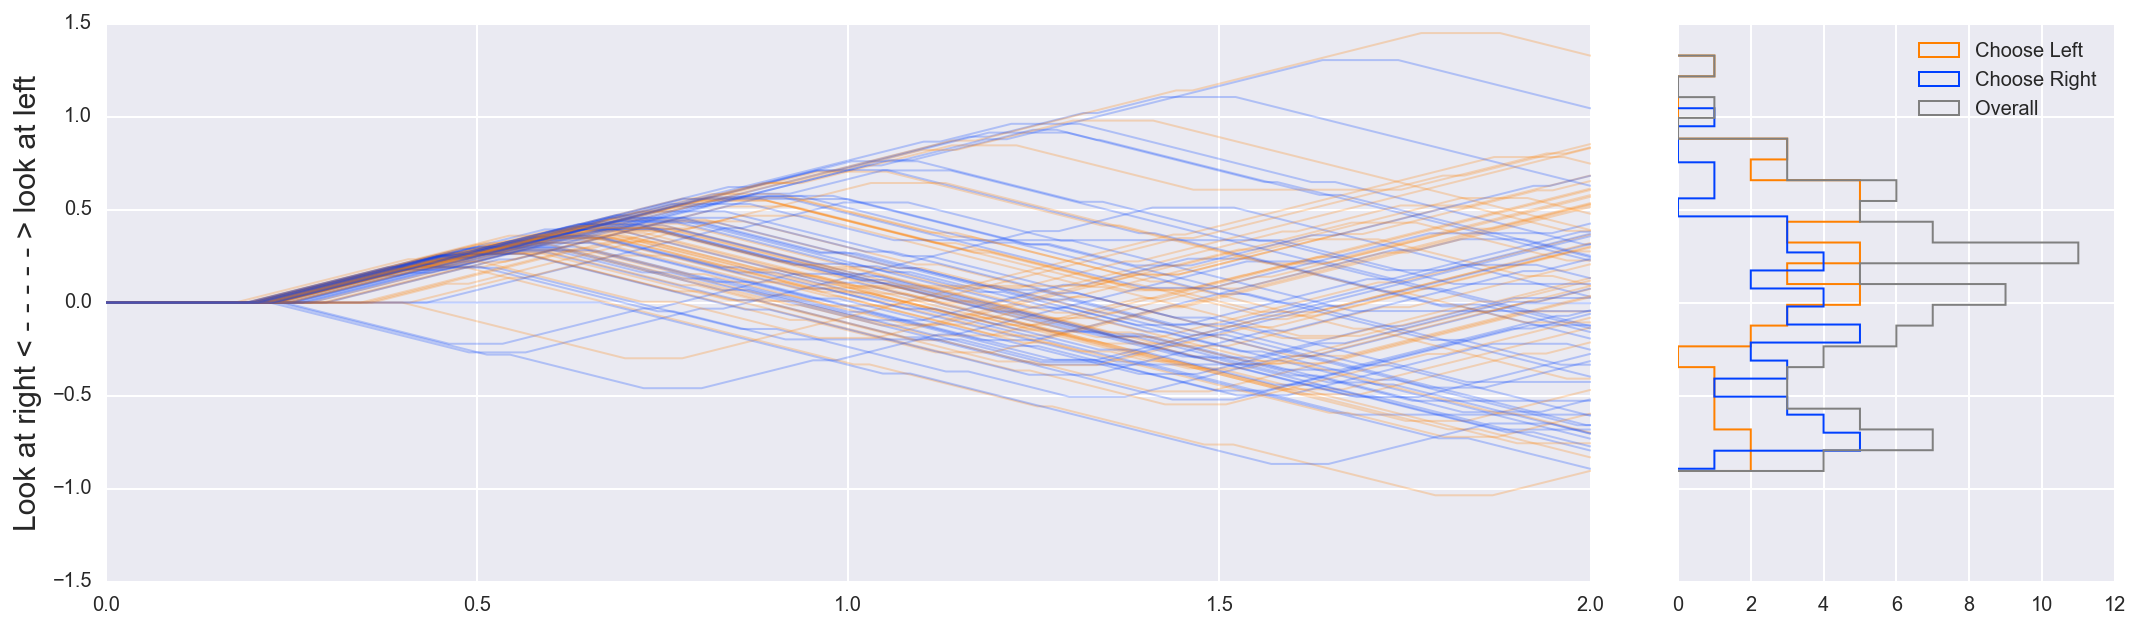

In [48]:
nsamp    = 2000
timemax  = 2.0
timeline = np.linspace(0,timemax,nsamp)
nbins    = 20
plt.figure(figsize = (18,5))
gs  = gridspec.GridSpec(1, 4)

colorspec = [[1,0.5,0],[0,0.25,1]]
ax1 = plt.subplot(gs[0,0:3])
dataall = []
respall = []
leftdur = np.zeros(ntrial)
rightdur= np.zeros(ntrial)

for tr,itrial in enumerate(trial):
    index = np.where(trialall==itrial)[1]
    resp  = sbjtbl['respond'][index[0]] - 1
    scanpath = np.zeros(nsamp)
    trfixdur = sbjtbl.fixdur[index]
    leftdur[tr]  = np.sum(trfixdur[loc[index]== 1])
    rightdur[tr] = np.sum(trfixdur[loc[index]==-1])
    for ij in index:
        onset   = sbjtbl['time_start'][ij]
        offset  = sbjtbl['time_end'][ij]
        sampon  = np.where(onset > timeline)[0][-1]
        if offset >= timemax:
            sampoff = nsamp
        else:
            sampoff = np.where(offset < timeline)[0][0]
        scanadd = np.linspace(0,sbjtbl['fixdur'][ij],sampoff-sampon)
        scanpath[sampon:sampoff] = scanpath[sampon:sampoff] + loc[ij]*scanadd
        scanpath[sampoff:]       = scanpath[sampoff:] + loc[ij]*scanadd[-1]
    ax1.plot(timeline,scanpath,lw = 1,color=colorspec[resp],alpha = .25)
    dataall.append([scanpath[-1]])
    respall.append([resp])
    
ax1.set_ylabel('Look at right < - - - - - > look at left',fontsize = 15)

dataall = np.asarray(dataall)
respall = np.asarray(respall)

ax2 = plt.subplot(gs[0,3],sharey=ax1)
for i in range(2):
    ax2.hist(dataall[respall==i],bins=nbins,normed=False,\
             orientation='horizontal',histtype='step',lw = 1,color=colorspec[i])
ax2.hist(dataall, bins=nbins,normed=False,orientation='horizontal',histtype='step',lw = 1,color='grey')
ax2.legend(['Choose Left','Choose Right','Overall'])

plt.setp(ax2.get_yticklabels(), visible=False)

plt.show()

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


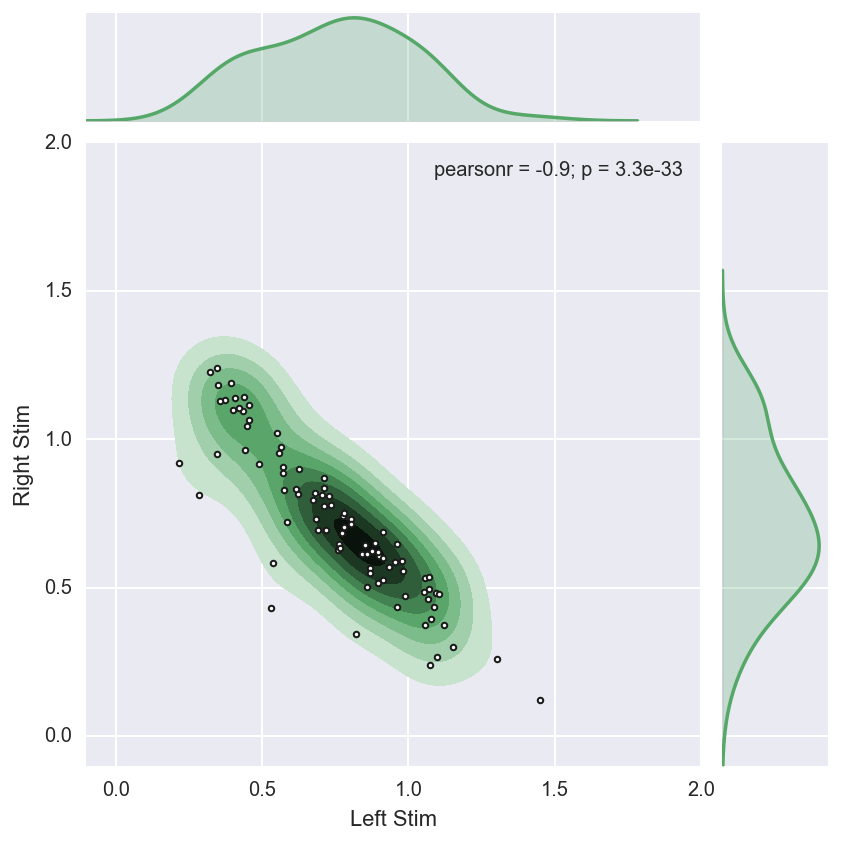

In [49]:
label1 = "Left Stim"
label2 = "Right Stim"

# Descriptive result
sns.set(color_codes=True)
datmp = np.zeros((ntrial, 2))
datmp[:,0]=leftdur
datmp[:,1]=rightdur

df = pd.DataFrame(datmp,columns=["x", "y"])

# sns.jointplot(x="x", y="y", data=df);

g = sns.jointplot(x="x", y="y", data=df, kind="kde", color="g", xlim=(-.1,timemax), ylim=(-.1,timemax))
g.plot_joint(plt.scatter, c="w", s=30, linewidth=1, marker=".")
g.ax_joint.collections[0].set_alpha(0)
g.set_axis_labels(label1, label2);
plt.show()